# Homework Assignment 1 - Ajay Gill

This is the work for the HW1. Data can be found in the "data" folder. Goal of this assignment is to predict our target variable is a new variable called `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

## Preliminaries

In [107]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import commonly used libraries and magic command for inline plotting

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [109]:
%matplotlib inline

## Work

This is where work gets done.

In [110]:
# Data Prep: Credit to Prof. Isken
housing_df = pd.read_csv("./data/kc_house_data_original.csv")

In [111]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [112]:
# Validate the integer values of True and False
print(int(True)) # Expect 1
print(int(False)) # Expect 0

1
0


In [113]:
# Create new `price_gt_1M` field based on whether or not `price` is greater than or equal to $1M.
housing_df['price_gt_1M'] = housing_df['price'].map(lambda x: int(x >= 1000000)) 

In [114]:
# Drop id and date columns
housing_df = housing_df.iloc[:, 2:]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1000 non-null   float64
 1   bedrooms       1000 non-null   int64  
 2   bathrooms      1000 non-null   float64
 3   sqft_living    1000 non-null   int64  
 4   sqft_lot       1000 non-null   int64  
 5   floors         1000 non-null   float64
 6   waterfront     1000 non-null   int64  
 7   view           1000 non-null   int64  
 8   condition      1000 non-null   int64  
 9   grade          1000 non-null   int64  
 10  sqft_above     1000 non-null   int64  
 11  sqft_basement  1000 non-null   int64  
 12  yr_built       1000 non-null   int64  
 13  yr_renovated   1000 non-null   int64  
 14  zipcode        1000 non-null   int64  
 15  lat            1000 non-null   float64
 16  long           1000 non-null   float64
 17  sqft_living15  1000 non-null   int64  
 18  sqft_lot1

In [115]:
# Reorder columns
newcols_class = [_ for _ in range(1, 20)]
newcols_class
newcols_regression = [_ for _ in range(1, 18)]
newcols_regression.extend([0])
newcols_regression
housing_class_df = housing_df.iloc[:, newcols_class]
housing_class_df.info()
housing_regression_df = housing_df.iloc[:, newcols_regression]
housing_regression_df.info()

# Prior data prep was done to write out the new dataframe to a new csv file, credit to Prof. Isken.
# housing_class_df.to_csv("./data/kc_house_data_classification.csv", index=False)
# housing_regression_df.to_csv("./data/kc_house_data_regression.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1000 non-null   int64  
 1   bathrooms      1000 non-null   float64
 2   sqft_living    1000 non-null   int64  
 3   sqft_lot       1000 non-null   int64  
 4   floors         1000 non-null   float64
 5   waterfront     1000 non-null   int64  
 6   view           1000 non-null   int64  
 7   condition      1000 non-null   int64  
 8   grade          1000 non-null   int64  
 9   sqft_above     1000 non-null   int64  
 10  sqft_basement  1000 non-null   int64  
 11  yr_built       1000 non-null   int64  
 12  yr_renovated   1000 non-null   int64  
 13  zipcode        1000 non-null   int64  
 14  lat            1000 non-null   float64
 15  long           1000 non-null   float64
 16  sqft_living15  1000 non-null   int64  
 17  sqft_lot15     1000 non-null   int64  
 18  price_gt_

In [116]:
# Define X and Y
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1000 non-null   float64
 1   bedrooms       1000 non-null   int64  
 2   bathrooms      1000 non-null   float64
 3   sqft_living    1000 non-null   int64  
 4   sqft_lot       1000 non-null   int64  
 5   floors         1000 non-null   float64
 6   waterfront     1000 non-null   int64  
 7   view           1000 non-null   int64  
 8   condition      1000 non-null   int64  
 9   grade          1000 non-null   int64  
 10  sqft_above     1000 non-null   int64  
 11  sqft_basement  1000 non-null   int64  
 12  yr_built       1000 non-null   int64  
 13  yr_renovated   1000 non-null   int64  
 14  zipcode        1000 non-null   int64  
 15  lat            1000 non-null   float64
 16  long           1000 non-null   float64
 17  sqft_living15  1000 non-null   int64  
dtypes: float6

In [117]:
# Define categorical and numerical columns (Task 4)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

all_cols = X.columns.tolist()

In [118]:
numeric_cols = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15']

In [119]:
categorical_cols = [ 'waterfront',
 'view',
 'condition',
 'grade',]

In [120]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'each col should be in either lists'

In [121]:
categorical_cols_index = [X.columns.get_loc(c) for c in categorical_cols]
categorical_cols_index

[6, 7, 8, 9]

In [122]:
numeric_cols_index = [X.columns.get_loc(c) for c in numeric_cols]
numeric_cols_index

[0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17]

In [123]:
X.iloc[:, categorical_cols_index].nunique()

waterfront    2
view          5
condition     5
grade         9
dtype: int64

In [124]:
X.iloc[:, numeric_cols_index].nunique()

price            580
bedrooms           8
bathrooms         19
sqft_living      321
sqft_lot         829
floors             6
sqft_above       291
sqft_basement    140
yr_built         114
yr_renovated      25
zipcode           69
lat              896
long             405
sqft_living15    267
dtype: int64

In [125]:
# Create a StandardScalar object to use on our numeric variables
# Create transformer objects
numeric_transformer = StandardScaler()

In [126]:
# Create transformer objects
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [127]:
 transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)]

In [128]:
# Bundle transformers together and combine into preprocessor step
preprocessor = ColumnTransformer(transformers)

In [129]:
# Create Classifier model 1: Ridge with C=1.0
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

In [130]:
# Append classifer to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifer', clf_model)])
# Make a diagram
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade'])])),
                ('classifer',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

In [131]:
# Make a diagram
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade'])])),
                ('classifer',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

In [132]:
# Model 0: Null Model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
predict = dummy_clf.predict(X)
score = dummy_clf.score(X, y)
predict
score

0.019

What would be the performance of a model in which we just predict 0 for everyone? 

In this model, the performance of the training score and test score would be 0.

In [133]:
# Next up, L2 Ridge regression...

In [134]:
# Model 1: L2 Ridge

# Classifier model 1 When C = 1.0
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

# Append classifer to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_model)])

# Fit model on new training data
clf.fit(X, y)

print("Training score: %.3f" % clf.score(X, y))
print("Test score: %.3f" % clf.score(X_test, y_test))

# Confusion Matrices
# print("Confusion matrix for training: %.3f" % metrics.confusion_matrix(X, y))
# print("Confusion matrix for test: %.3f" % metrics.confusion_matrix(X_test, y_test))

Training score: 0.574
Test score: 0.550


C:\Users\ajayg\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Create a plot of the coefficients (using coef_plot function)

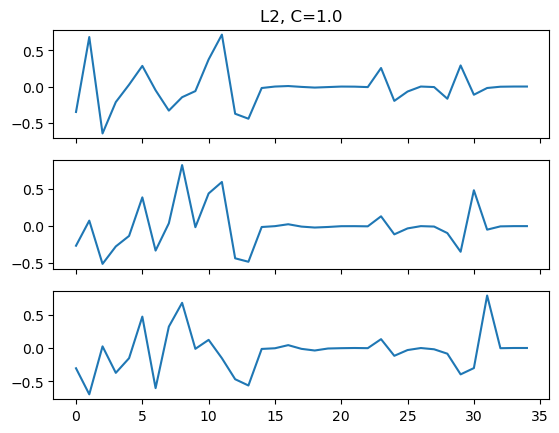

In [135]:
# clf.named_steps['classifier'].coef_shape

def coef_plot(model, title="Coefficients"):
    fig, ax = plt.subplots(3, sharex=True)
    
    if title:
        ax[0].set_title(title)
    
    for i in range(3):
        ax[i].plot(model.steps[1][1].coef_[i])
        
        
coef_plot(clf, 'L2, C=1.0')

In [ ]:
# Model 2: L1 Lasso if C=1.0

# Classifier model
clf_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifer to preprocessing pipeline
clf_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_model)])

# Fit model on new training data
clf_model.fit(X, y)

print("Training score: %.3f" % clf_model.score(X, y))
print("Test score: %.3f" % clf_model.score(X_test, y_test))

coef_plot(clf_model, 'L1, C=1')

Compare Models 1 and 2: The Lasso model has a lower training and test score than the Ridge model.

In [ ]:
# Model 3: What if C is 0.01 (L1 Lasso)

# Classifier model
clf_model_C01 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=500)

# Append classifer to preprocessing pipeline
clf_C01 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_model_C01)])

# Fit model on training data
clf_C01.fit(X, y)

print("Training score: %.3f" % clf_C01.score(X, y))
print("Test score: %.3f" % clf_C01.score(X_test, y_test))

The Lasso model with C of 0.01 has a lower training and test score than the Lasso model with C of 1.0. Thus, this enforces more regularization. The plot looks different because you are using a C of 0.01 in the latest model above.

In [ ]:
# Task 5: Simple Decision Tree

# Create a StandardScalar object to use on our numeric variables
# Create transformer objects
numeric_transformer = StandardScaler()
# Create transformer objects
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)]
# Bundle transformers together and combine into preprocessor step
preprocessor = ColumnTransformer(transformers)

# Append random forest classifier to preprocessing pipeline
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(oob_score=True, random_state=73))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

clf_rf.fit(X_train, y_train)
print("training model score: %.3f" % clf_rf.score(X_train, y_train))
print("test model score: %.3f" % clf_rf.score(X_test, y_test))

The model training score was 1.000, while the test score was 0.045 which is higher than model 3's test score. 

In [ ]:
# Model 4: Lasso (L1 with optimal C-value) using LogisticRegressionCV function

# Final logistic regression classifer model
clf_model_final = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=500)

# Append classifer to preprocessing pipeline
clf_model_final = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_model_final)])

# Fit model on training data
clf_model_final.fit(X_train, y_train)
print("Training score: %.3f" % clf_model_final.score(X_train, y_train))

# Make predictions on test data and print a few
clf_model_final_predict = clf_model_final.predict(X_test)
print(clf_model_final_predict[:10])

# LogisticRegressionCV
l1_ratios = list(np.linspace(0, 1, 5))

for penalty in ['l2', 'l2', 'elasticnet']:
    lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegressionCV(penalty=penalty, Cs=[0.1, 1, 10],
                            l1_ratios=l1_ratios, solver='saga', max_iter=200))])
    lr_clf.fit(X_train, y_train)
    print(f"Best model score for {penalty} : {lr_clf['classifer'].scores_}")

In comparison, the score in Model 4 is more than the scores prior from Models 2 and 3. The optimal value of C is 0.01 - regularization does not help for this problem.